In [1]:
# This notebook illustrates the halfar ice model

# Import funman related code
import os
from pathlib import Path
from funman import FunmanResults
import json
from funman import Point, Box, Parameter
from typing import List, Dict
from funman.api.run import Runner

# %load_ext autoreload
# %autoreload 2

2023-11-01 21:11:08,959 - funman.server.worker - INFO - FunmanWorker running...
2023-11-01 21:11:08,967 - funman.server.worker - INFO - Starting work on: a99c05ac-e487-4b09-8cbf-7dd0dba678ce


2023-11-01 21:11:10,974 - funman.api.run - INFO - Dumping results to ./out/a99c05ac-e487-4b09-8cbf-7dd0dba678ce.json
2023-11-01 21:11:12,905 - funman.scenario.consistency - INFO - 16:	[+]
2023-11-01 21:11:12,912 - funman.server.worker - INFO - Completed work on: a99c05ac-e487-4b09-8cbf-7dd0dba678ce
2023-11-01 21:11:22,911 - funman.server.worker - INFO - Worker.stop() acquiring state lock ....
2023-11-01 21:11:22,920 - funman.server.worker - INFO - FunmanWorker exiting...
2023-11-01 21:11:22,923 - funman.server.worker - INFO - Worker.stop() completed.


gamma = 0.06325
1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
{}
           h_0       h_1       h_2       h_3       h_4  id label
time                                                            
0.0   0.100000  0.500000  1.000000  0.500000  0.100000   0  true
1.0   0.100494  0.483693  0.999747  0.500127  0.115940   0  true
2.0   0.100954  0.467475  0.999523  0.500239  0.131809   0  true
3.0   0.101380  0.451326  0.999324  0.500338  0.147617   0  true
4.0   0.101770  0.435144  0.999150  0.500425  0.163459   0  true
5.0   0.102124  0.419036  0.998998  0.500501  0.179284   0  true
6.0   0.102443  0.402997  0.998867  0.500567  0.195067   0  true
7.0   0.102727  0.387021  0.998753  0.500623  0.210811   0  true
8.0   0.102978  0.371104  0.998656  0.500672  0.226523   0  true
9.0   0.103199  0.355239  0.998574  0.500713  0.242141   0  true
10.0  0.103389  0.339511  0.998506  0.500747  0.257780   0  true
11.0  0.103552  0.323987  0.998448  0.500776  0.273375   0  true
12.0  0.103691  0.308501  0.998

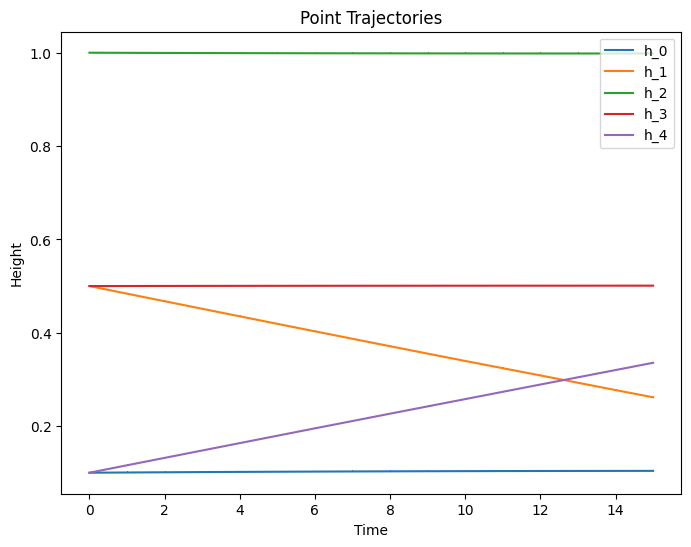

In [9]:
RESOURCES = os.path.join(
   os.getcwd(), "../../resources"
)
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "halfar")
MODEL_PATH = os.path.join(EXAMPLE_DIR, "halfar.json")
REQUEST_PATH = os.path.join(EXAMPLE_DIR, "halfar_request.json")

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
                # {"timepoints": [0, 10]}
            ],
        },
        
    ],
    "constraints": [
        # {"name": "non-negative_h_0",
        #  "variable": "h_0",
        #  "interval": {"lb": 0}
        #  },
        # {"name": "non-negative_h_1",
        #  "variable": "h_1",
        #  "interval": {"lb": 0}
        # },
        # {"name": "non-negative_h_2",
        #  "variable": "h_2",
        #  "interval": {"lb": 0}
        # },
        # {"name": "non-negative_h_3",
        #  "variable": "h_3",
        #  "interval": {"lb": 0}
        # },
        # {"name": "non-negative_h_4",
        #  "variable": "h_4",
        #  "interval": {"lb": 0}
        # },
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }
        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-1,
        "verbosity": 20,
        "dreal_mcts": True,
        "save_smtlib": True,
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
)
print(f"gamma = {results.parameter_space.points()[0].values['gamma']:.5f}")
results.plot(variables=["h_0", "h_1", "h_2", "h_3", "h_4"], label_marker={"true":",", "false": ","},  xlabel="Time", ylabel="Height", legend=["h_0", "h_1", "h_2", "h_3", "h_4"],label_color={"true": None})
points = results.points()
boxes = results.parameter_space.boxes()

print(
    f"{len(points)} Points (+:{len(results.parameter_space.true_points())}, -:{len(results.parameter_space.false_points())}), {len(boxes)} Boxes (+:{len(results.parameter_space.true_boxes)}, -:{len(results.parameter_space.false_boxes)})"
)
if points and len(points) > 0:
    point: Point = points[-1]
    parameters: Dict[Parameter, float] = results.point_parameters(point)
    print(parameters)
    print(results.dataframe([point]))
else:
    # if there are no points, then we have a box that we found without needing points

    box = boxes[0]
    print(json.dumps(box.explain(), indent=4))


